In [1]:
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
import numpy as np
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
#import seaborn as sns
import glob
%matplotlib inline 
from sklearn.model_selection import train_test_split

Using Theano backend.


In [2]:
image= Image.open("/home/aries/Desktop/train/cat.0.jpg")

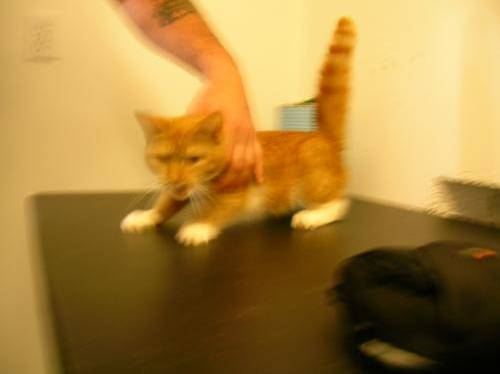

In [3]:
image

In [4]:
image.size

(500, 374)

In [5]:
def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized)
    return image_array

In [6]:
imag=image.resize([224,224])

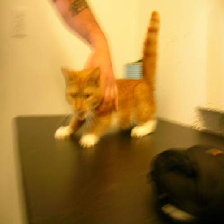

In [7]:
imag

In [8]:
image_array=np.array(imag).T

In [9]:
image_array

array([[[203, 203, 203, ..., 156, 153, 152],
        [204, 204, 204, ..., 157, 154, 152],
        [207, 207, 207, ..., 158, 155, 153],
        ..., 
        [245, 245, 246, ...,   3,   2,   2],
        [244, 244, 245, ...,   3,   2,   2],
        [240, 241, 241, ...,   3,   2,   2]],

       [[164, 164, 164, ..., 123, 122, 121],
        [165, 165, 165, ..., 124, 123, 121],
        [168, 168, 168, ..., 125, 124, 122],
        ..., 
        [205, 205, 205, ...,   3,   2,   2],
        [203, 203, 204, ...,   3,   2,   2],
        [201, 202, 202, ...,   3,   2,   2]],

       [[ 87,  87,  87, ...,  56,  55,  54],
        [ 88,  88,  88, ...,  57,  56,  54],
        [ 91,  91,  91, ...,  58,  57,  55],
        ..., 
        [120, 120, 123, ...,   1,   0,   0],
        [121, 121, 122, ...,   1,   0,   0],
        [122, 123, 123, ...,   1,   0,   0]]], dtype=uint8)

In [10]:
dog_files=glob.glob("/home/aries/Desktop/train/dog*")

In [11]:
dog_files=dog_files[:2000]

In [12]:
cat_files = glob.glob("/home/aries/Desktop/train/cat*")

In [13]:
cat_files=cat_files[:2000]

In [14]:
cat_files

['/home/aries/Desktop/train/cat.651.jpg',
 '/home/aries/Desktop/train/cat.1885.jpg',
 '/home/aries/Desktop/train/cat.10034.jpg',
 '/home/aries/Desktop/train/cat.3588.jpg',
 '/home/aries/Desktop/train/cat.6907.jpg',
 '/home/aries/Desktop/train/cat.11649.jpg',
 '/home/aries/Desktop/train/cat.7661.jpg',
 '/home/aries/Desktop/train/cat.9757.jpg',
 '/home/aries/Desktop/train/cat.5441.jpg',
 '/home/aries/Desktop/train/cat.10909.jpg',
 '/home/aries/Desktop/train/cat.11463.jpg',
 '/home/aries/Desktop/train/cat.9567.jpg',
 '/home/aries/Desktop/train/cat.9723.jpg',
 '/home/aries/Desktop/train/cat.3479.jpg',
 '/home/aries/Desktop/train/cat.8215.jpg',
 '/home/aries/Desktop/train/cat.9056.jpg',
 '/home/aries/Desktop/train/cat.7629.jpg',
 '/home/aries/Desktop/train/cat.4236.jpg',
 '/home/aries/Desktop/train/cat.844.jpg',
 '/home/aries/Desktop/train/cat.6388.jpg',
 '/home/aries/Desktop/train/cat.5430.jpg',
 '/home/aries/Desktop/train/cat.9551.jpg',
 '/home/aries/Desktop/train/cat.12385.jpg',
 '/home/

In [15]:
cat_list=convert_image_to_data("/home/aries/Desktop/train/cat.0.jpg", 224, 224)

In [16]:
cat_list

array([[[203, 164,  87],
        [204, 165,  88],
        [207, 168,  91],
        ..., 
        [245, 205, 120],
        [244, 203, 121],
        [240, 201, 122]],

       [[203, 164,  87],
        [204, 165,  88],
        [207, 168,  91],
        ..., 
        [245, 205, 120],
        [244, 203, 121],
        [241, 202, 123]],

       [[203, 164,  87],
        [204, 165,  88],
        [207, 168,  91],
        ..., 
        [246, 205, 123],
        [245, 204, 122],
        [241, 202, 123]],

       ..., 
       [[156, 123,  56],
        [157, 124,  57],
        [158, 125,  58],
        ..., 
        [  3,   3,   1],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[153, 122,  55],
        [154, 123,  56],
        [155, 124,  57],
        ..., 
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [153, 122,  55],
        ..., 
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,

In [17]:
def creating_test_train_datset(WIDTH,HEIGHT):
    #cat=glob.glob("/home/ashiya/Downloads/dog_vs_cat/train//cat.*")
    #dog=glob.glob("/home/ashiya/Downloads/dog_vs_cat/train/dog*")
    
    cat_list=[convert_image_to_data(i, WIDTH, HEIGHT) for i in cat_files]
    dog_list=[convert_image_to_data(i,WIDTH,HEIGHT) for i in dog_files]
    
    y_cat_list=np.zeros(len(cat_list))
    y_dog_list=np.ones(len(dog_list))
    x=np.concatenate([cat_list,dog_list])
    y=np.concatenate([y_cat_list,y_dog_list])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [19]:
#categorical me karta hai khud se zero aur 1,2 deta hai
num_classes = 2
X_train,X_test,y_train,y_test=creating_test_train_datset(224,224)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print X_train.shape[1:]

(224, 224, 3)


In [20]:
batch_size = 64

epochs = 10


model= Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


opt = keras.optimizers.adam(lr=0.0001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.)

#rmsprop
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
activation_3 (Activation)    (None, 111, 111, 64)      0         
__________

In [21]:
#batch_size = 32
#num_classes = 10 should be 2 not 10 because we have to classify only dog and cat
#epochs = 100

In [22]:
model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test))

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 860s 269ms/step - loss: 0.6900 - acc: 0.5378 - val_loss: 0.6708 - val_acc: 0.6375
Epoch 2/10
3200/3200 [==============================] - 865s 270ms/step - loss: 0.6490 - acc: 0.6206 - val_loss: 0.6351 - val_acc: 0.6375
Epoch 3/10
3200/3200 [==============================] - 885s 277ms/step - loss: 0.5947 - acc: 0.6766 - val_loss: 0.6370 - val_acc: 0.6375
Epoch 4/10
3200/3200 [==============================] - 963s 301ms/step - loss: 0.5578 - acc: 0.7125 - val_loss: 0.5751 - val_acc: 0.7075
Epoch 5/10
3200/3200 [==============================] - 931s 291ms/step - loss: 0.5194 - acc: 0.7447 - val_loss: 0.5630 - val_acc: 0.7025
Epoch 6/10
3200/3200 [==============================] - 905s 283ms/step - loss: 0.4856 - acc: 0.7697 - val_loss: 0.5587 - val_acc: 0.7238
Epoch 7/10
3200/3200 [==============================] - 887s 277ms/step - loss: 0.4494 - acc: 0.7950 - val_loss: 0.5440 - val

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

NameError: name 'model_from_json' is not defined

In [ ]:
test_files=glob.glob("/home/ashiya/Downloads/dog_vs_cat/test1/*")

In [ ]:
test_image_list=[convert_image_to_data(i,HEIGHT,WIDTH) for i in test_files]

In [ ]:

y_test_predict = model.predict(test_image_list)